In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoLars
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [15]:
rossmann_df = pd.read_csv("/content/Rossmann Stores Data - Copy.csv")

<ipython-input-15-d09465b873f4>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_df = pd.read_csv("/content/Rossmann Stores Data - Copy.csv")


In [13]:
store_df = pd.read_csv("/content/store.csv")

In [16]:
rossmann_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [17]:
rossmann_df.tail(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [18]:
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [19]:
df = rossmann_df.merge(right = store_df, on = "Store", how = "left")

In [20]:
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [22]:
df.shape

(1017209, 18)

In [23]:
# Dataset Duplicate Value Count

# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(f'There are {len(duplicate_rows)} duplicate rows in the data.')

# Find duplicate rows based on a specific column(s)
duplicate_sales = df[df.duplicated(subset=['Sales'])]

# Print the number of duplicate sales
print(f'There are {len(duplicate_sales)} rows with duplicate sales values.')

There are 0 duplicate rows in the data.
There are 995475 rows with duplicate sales values.


In [24]:

# Missing Values/Null Values Count
df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


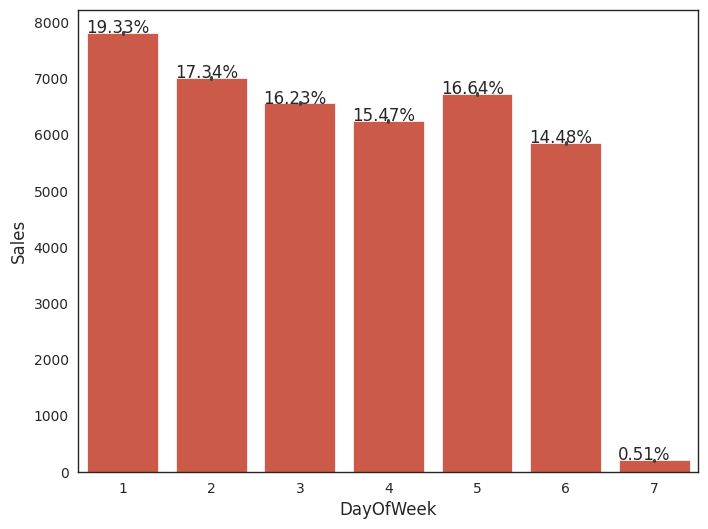

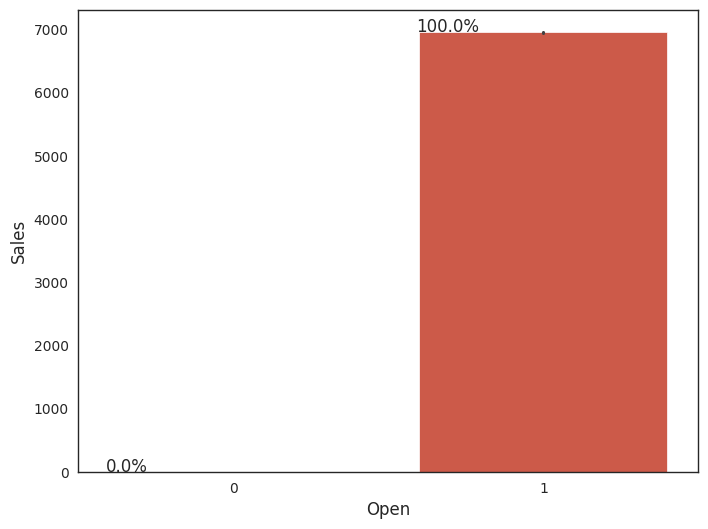

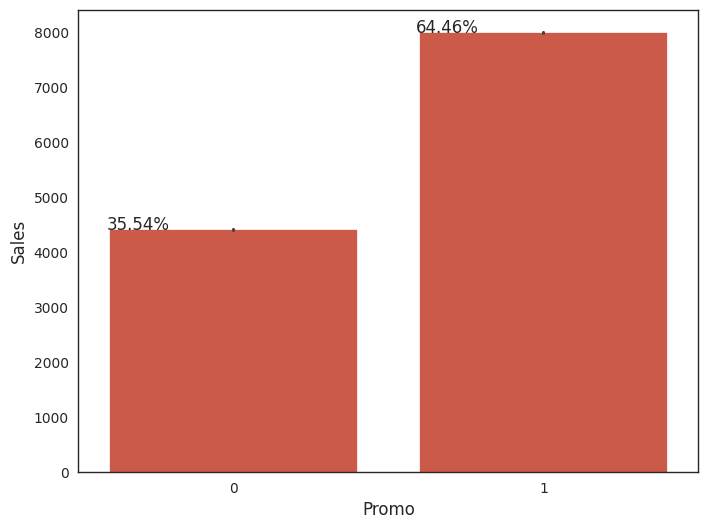

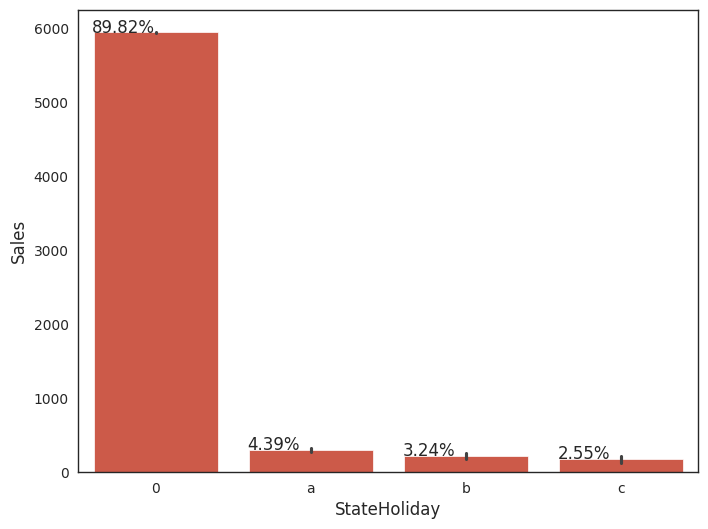

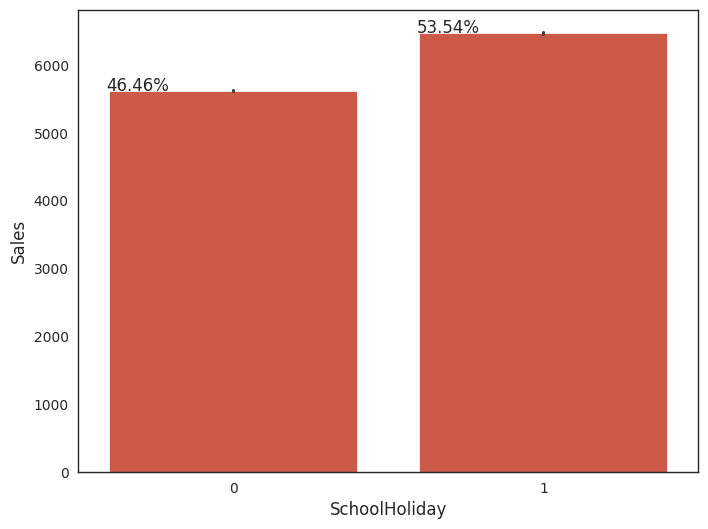

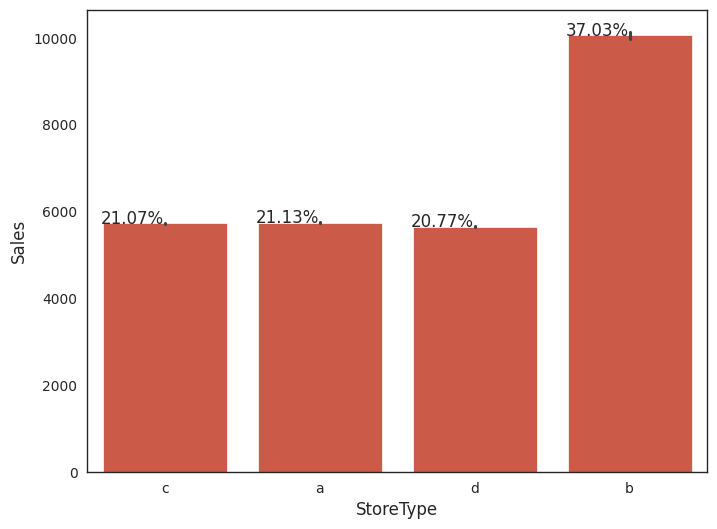

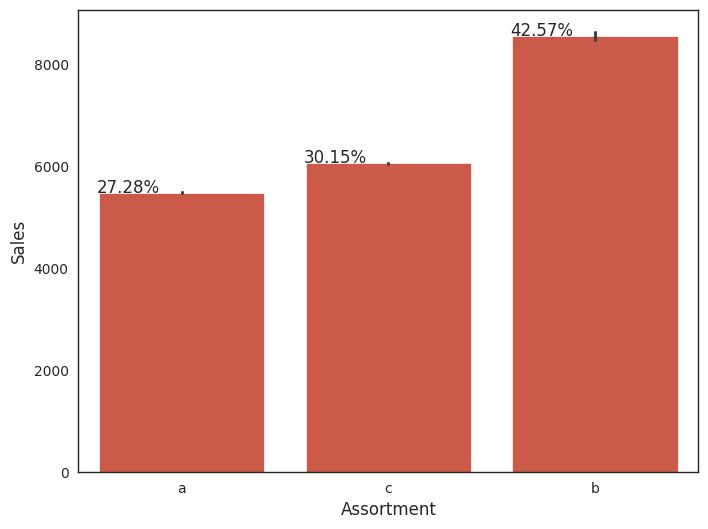

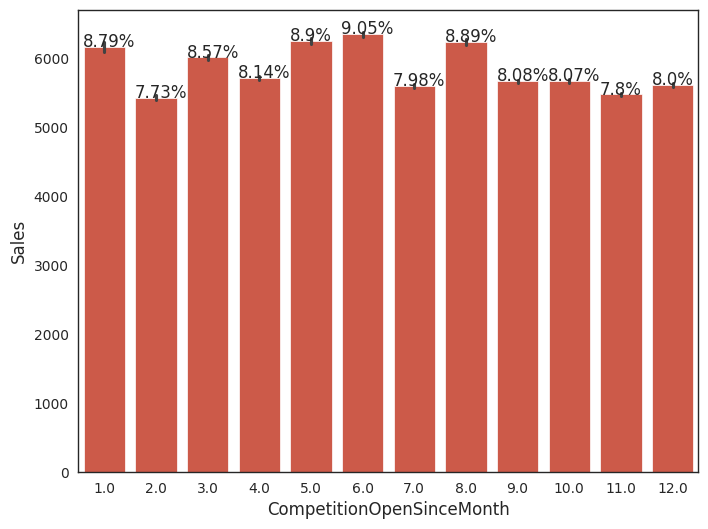

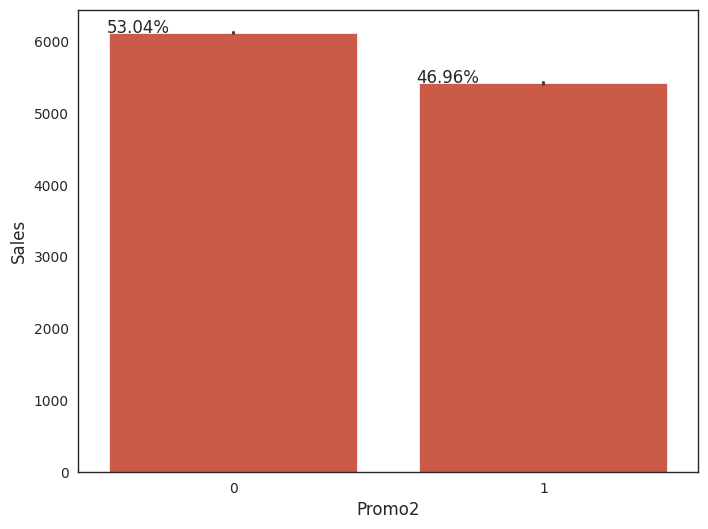

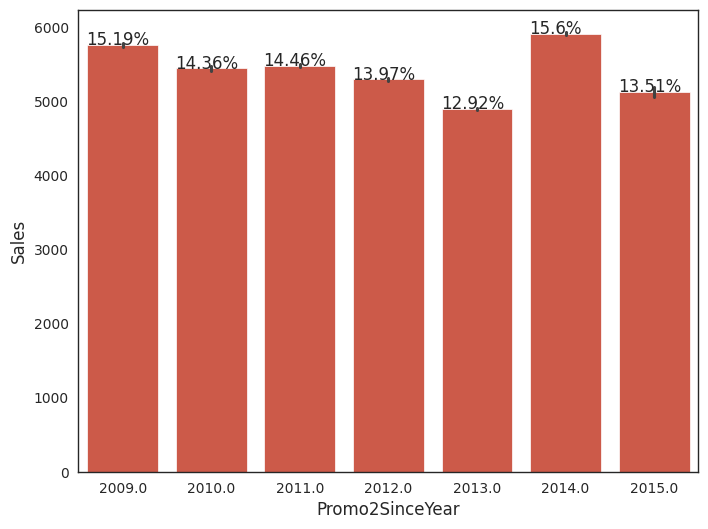

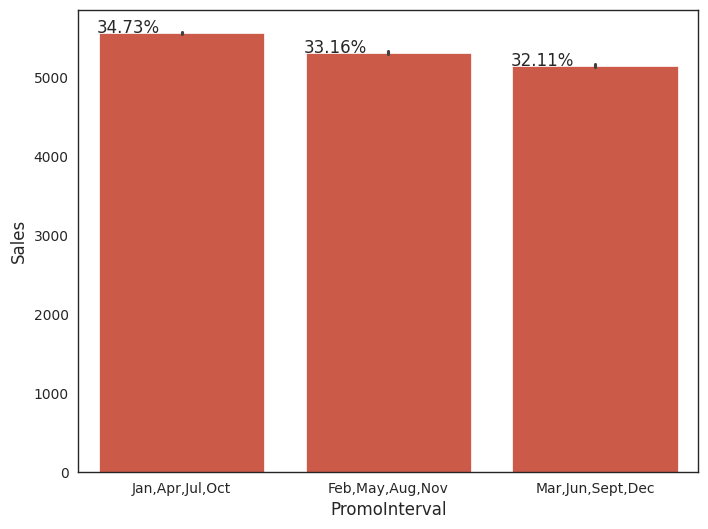

In [26]:
# Chart - 1 visualization

# Code for barplots of the categorical variables against sales
# Iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales'])
  totals = []
  for i in ax.patches: # for every patch in the barplot ax
      totals.append(i.get_height()) # append height for each patch

  total = sum(totals) # sum of each patch height for a plot

  for i in ax.patches:
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  # text position and formula for percentage
  plt.show()

In [27]:

df.CompetitionDistance.fillna(df.CompetitionDistance.median(), inplace=True)

In [28]:
def remove_outlier(df_in, col_name):

  ''' The code provides a function that removes
  outliers from a given column of a pandas DataFrame
  using the IQR method. The IQR method involves calculating
  the quartiles of the data and defining a range around
  the middle 50% of the data, outside of which any data
  points are considered outliers. The function returns a
  new DataFrame with the outliers removed from the specified column
  '''
  q1 = df_in[col_name].quantile(0.25)
  q3 = df_in[col_name].quantile(0.75)
  iqr = q3-q1 # Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
  return df_out

In [29]:

# Defining new variable after removing outliers
df = remove_outlier(df, 'Sales')

In [30]:
# Data information. Inspecting each columns and its dtype of the new df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990515 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      990515 non-null  int64  
 1   DayOfWeek                  990515 non-null  int64  
 2   Date                       990515 non-null  object 
 3   Sales                      990515 non-null  int64  
 4   Customers                  990515 non-null  int64  
 5   Open                       990515 non-null  int64  
 6   Promo                      990515 non-null  int64  
 7   StateHoliday               990515 non-null  object 
 8   SchoolHoliday              990515 non-null  int64  
 9   StoreType                  990515 non-null  object 
 10  Assortment                 990515 non-null  object 
 11  CompetitionDistance        990515 non-null  float64
 12  CompetitionOpenSinceMonth  675138 non-null  float64
 13  CompetitionOpenSinceYear   675138

In [33]:
# Manipulate Features to minimize feature correlation and create new features

# Number of instances in the dataset where stores are closed and have zero sales
# Since closed stores do not generate any sales, we will exclude them from the analysis
df = df[df.Open != 0]

In [34]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [35]:
# Checking if there is any open store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [36]:
# Calculating the percentage of open stores that did not generate any sales.
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [37]:

# Removing this part of data to avoid bias
df = df[df.Sales != 0]

In [38]:
# Making a copy of the new dataframe
df_new = df.copy()

In [39]:
# Creating dummy variables for categorical columns in the dataframe to enable their use in statistical modeling and analysis
df_new = pd.get_dummies(df_new, columns = ['StoreType','Assortment'])

In [40]:

# Checking the first 5 rows of data
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,0,1,1270.0,9.0,...,NaN,NaN,NaN,False,False,True,False,True,False,False
1,2,5,2015-07-31,6064,625,1,0,1,570.0,11.0,...,13.0,2010.0,"Jan,Apr,Jul,Oct",True,False,False,False,True,False,False
2,3,5,2015-07-31,8314,821,1,0,1,14130.0,12.0,...,14.0,2011.0,"Jan,Apr,Jul,Oct",True,False,False,False,True,False,False
3,4,5,2015-07-31,13995,1498,1,0,1,620.0,9.0,...,NaN,NaN,NaN,False,False,True,False,False,False,True
4,5,5,2015-07-31,4822,559,1,0,1,29910.0,4.0,...,NaN,NaN,NaN,True,False,False,False,True,False,False


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

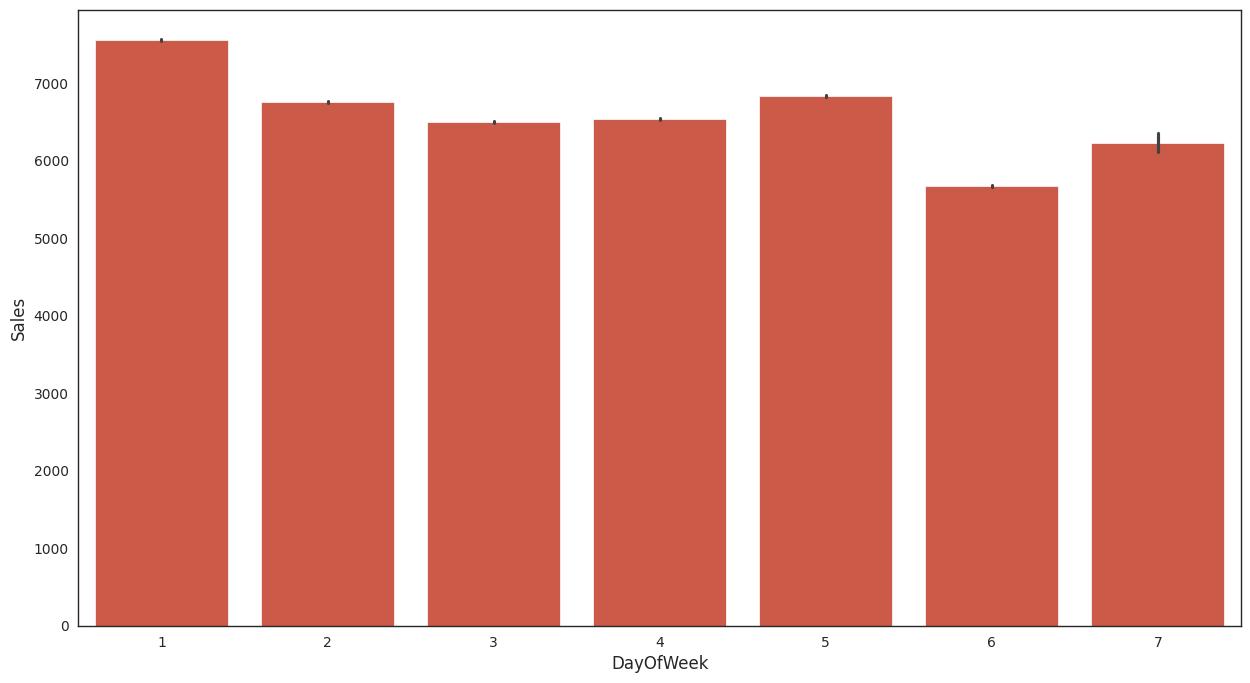

In [41]:
# This code generates a plot to visualize the relationship between sales and the day of the week
plt.figure(figsize = (15,8))
sns.barplot(x = 'DayOfWeek', y = 'Sales' , data = df_new)

In [43]:
# Creating feature matrix 'X' and target vector 'y'
X = df_new.drop(['Sales','Store','Date','StateHoliday'] , axis = 1) # Removed 'Year' from the list of columns to drop
y = df_new.Sales

In [44]:
# Finding the shape of the matrix 'X'
X.shape

(817644, 18)

In [45]:
# Checking the first 5 rows of data
X.head(5)


,DayOfWeek,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,False,False,True,False,True,False,False
1,5,625,1,1,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",True,False,False,False,True,False,False
2,5,821,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",True,False,False,False,True,False,False
3,5,1498,1,1,620.0,9.0,2009.0,0,NaN,NaN,NaN,False,False,True,False,False,False,True
4,5,559,1,1,29910.0,4.0,2015.0,0,NaN,NaN,NaN,True,False,False,False,True,False,False


In [46]:
# Dataset Info

# Data information. Inspecting each columns and its dtype
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 817644 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DayOfWeek                  817644 non-null  int64  
 1   Customers                  817644 non-null  int64  
 2   Promo                      817644 non-null  int64  
 3   SchoolHoliday              817644 non-null  int64  
 4   CompetitionDistance        817644 non-null  float64
 5   CompetitionOpenSinceMonth  557015 non-null  float64
 6   CompetitionOpenSinceYear   557015 non-null  float64
 7   Promo2                     817644 non-null  int64  
 8   Promo2SinceWeek            413748 non-null  float64
 9   Promo2SinceYear            413748 non-null  float64
 10  PromoInterval              413748 non-null  object 
 11  StoreType_a                817644 non-null  bool   
 12  StoreType_b                817644 non-null  bool   
 13  StoreType_c                817644

In [47]:

# Checking the first 5 rows of data, giving us a quick look at the format and range of the data
y.head

<bound method NDFrame.head of 0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 817644, dtype: int64>

In [48]:

# Splitting the data set into training and test set using scikit-learn's train_test_split function
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [49]:
# Finding the columns of the training data set
columns = X_train.columns
columns

Index(['DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

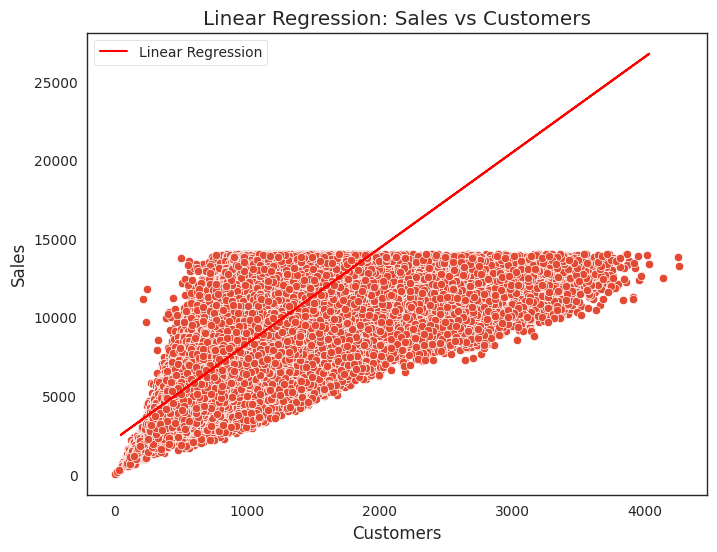

In [85]:
# prompt: from the data in the above file give me a linear regression graph code in python between Sales and Customers

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'Sales' and 'Customers' are columns in your DataFrame 'df'

X = df[['Customers']]  # Features (independent variable)
y = df['Sales']  # Target (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a scatter plot of Sales vs Customers
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customers', y='Sales', data=df)

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Linear Regression')

plt.xlabel('Customers')
plt.ylabel('Sales')
plt.title('Linear Regression: Sales vs Customers')
plt.legend()
plt.show()


In [86]:
# prompt: Cross- Validation & Hyperparameter Tuning give me code for above one

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Assuming 'X' and 'y' are your feature matrix and target variable

# 1. Cross-Validation:
# Example using 5-fold cross-validation with Linear Regression
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", -scores)
print("Average RMSE:", np.sqrt(-scores).mean())


# 2. Hyperparameter Tuning with Grid Search (Example with ElasticNet):
# Define parameter grid for ElasticNet
param_grid = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}

model = ElasticNet()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# You can then use the best model from grid search for predictions:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Cross-Validation Scores: [2692023.72326715 2544645.1586794  2492710.25429405 2496979.91293728
 2258207.51131717]
Average RMSE: 1579.5363897751533
Best Hyperparameters: {'alpha': 10, 'l1_ratio': 0.5}
Best Score (Negative MSE): -2490203.143195436
R-squared: 0.5901617387906918
RMSE: 1575.1352737344405


In [89]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have trained your model and have predictions for both train and test sets

# Calculate RMSE for training set
model.fit(X_train, y_train) # fit the model before predicting
y_train_pred = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate RMSE for test set
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("RMSE for Training Set:", rmse_train)
print("RMSE for Test Set:", rmse_test)

RMSE for Training Set: 1578.0171930309539
RMSE for Test Set: 1575.1360805272018


In [93]:
# Linear Regression
train_score_1 = 0.7880166684546027

In [94]:
#Linear regression
test_score_1 = 0.7816886562996359

In [99]:
#Lasso regression
train_score_2 = 0.7880849733619616

In [100]:
#Lasso regression
test_score_2 = 0.7821477157945707

In [98]:

# Creating a Pandas DataFrame to store the training and testing scores of two regression models: Linear Regression and Lasso Regression.
score_df = pd.DataFrame({'Train_Score': [train_score_1, train_score_2], 'Test_Score': [test_score_1, test_score_2]}, index=['Linear Regression', 'Lasso Regression'])
score_df

,Train_Score,Test_Score
Linear Regression,0.788017,0.781689
Lasso Regression,0.788085,0.782148


In [102]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso # Import Lasso object

# Training Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Training Lasso Regression model
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)

# Making predictions on test set
lin_reg_pred = lin_reg.predict(X_test)
lasso_reg_pred = lasso_reg.predict(X_test)

# Computing performance metrics for both models
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_pred)

lin_reg_r2 = r2_score(y_test, lin_reg_pred)
lasso_reg_r2 = r2_score(y_test, lasso_reg_pred)

# Printing performance metrics
print("Linear Regression MSE: ", lin_reg_mse)
print("Lasso Regression MSE: ", lasso_reg_mse)

print("Linear Regression R2 score: ", lin_reg_r2)
print("Lasso Regression R2 score: ", lasso_reg_r2)

Linear Regression MSE:  2481053.9558890783
Lasso Regression MSE:  2481053.9478832628
Linear Regression R2 score:  0.5901612720824769
Lasso Regression R2 score:  0.5901612734049364


Thank you!
